## Naive Bayes Models
---

### [Naive Bayes Classifiers](https://brilliant.org/wiki/naive-bayes-classifier/)
by [John McGonagle](https://brilliant.org/profile/john-9143r5/about/#)

<br><br>
Naive Bayes, also known as Naive Bayes Classifiers are classifiers with the assumption that features are statistically independent of one another. Unlike many other classifiers which assume that, for a given class, there will be some correlation between features, naive Bayes explicitly models the features as conditionally independent given the class. While this may seem an overly simplistic (naive) restriction on the data, in practice naive Bayes is competitive with more sophisticated techniques and enjoys some theoretical support for its efficacy.

Because of the independence assumption, naive Bayes classifiers are highly scalable and can quickly learn to use high dimensional features with limited training data. This is useful for many real world datasets where the amount of data is small in comparison with the number of features for each individual piece of data, such as speech, text, and image data. Examples of modern applications include spam filtering, automatic medical diagnoses, medical image processing, and vocal emotion recognition.

### Mathematical Elements
#### 1.  _Bayes' theorem_
* It describes the probability of an event, based on prior knowledge of conditions that might be related to the event.


* Formula: 
$$p\left(y|x\right)=\frac{p\left(x|y\right)p\left(y\right)}{p\left(x\right)}$$

where,
* $p\left(y|x\right)$ is a conditional probability; the likelihood of event $y$ occurring given that $x$ is true.

* $p\left(x|y\right)$ is also a conditional probability; the likelihood of event $x$ occurring given that $y$ is true.

* $p\left(y\right)$ and $p\left(x\right)$ are the probabilities of observing $y$ and $x$ respectively; they are known as the marginal probability.

#### 2.  _Gaussian Naive Bayes_

$$p\left(C∣G_1,G_2,...G_x\right) \propto p(C) * f\left(G_1|\mu_{G_1C},\sigma_{G_1C}\right) * f\left(G_2∣\mu_{G_2C},\sigma_{G_2C}\right) * ... * f\left(G_x∣\mu_{G_xC},\sigma_{G_xC}\right)$$

where,

* G = Gene Expression Value
* C = Condition i.e. {Case or Control}
* $$f\left(G∣\mu_{GC}\right) = P(G) = \frac{1}{\sigma_G\sqrt(2 \pi)}e ^{-(G - \mu_G)^2/2\sigma_G^2}$$

$G$ is the newly encountered expression

#### Step 1: Load libraries

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt

# Import custom functions
import estimate as es

# Sklearn's Gaussian NB
from sklearn.naive_bayes import GaussianNB

# This will print entire output of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Step 2: Loading features and labels
* Load as numpy-array for easier computation

In [2]:
# Loading training data
train_features = pd.read_csv("../DataPrep/training_features.csv").values
train_labels = pd.read_csv("../DataPrep/training_labels.csv").values

# Loading testing data
test_features = pd.read_csv("../DataPrep/testing_features.csv").values
test_labels = pd.read_csv("../DataPrep/testing_labels.csv").values

#### Step 3: Fitting the model
* Making object as ```clf``` for fitting the model on training data
* Using Gaussian Naive Bayes

In [3]:
# Making Object
clf = GaussianNB()

# Fitting on the training data
clf.fit(train_features, train_labels)

/home/sirius/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

#### Step 4: Making predictions
* Predcted the labels for test features using ```predict()``` method

In [4]:
# Predicting labels of the test data
predictions = clf.predict(test_features)

# Predictions
print("Predicted labels are as follows-")
predictions

Predicted labels are as follows-


array(['Control', 'Case', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Case', 'Control', 'Case', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Case', 'Control', 'Case'], dtype='<U7')

#### Step 5: Performance Estimation
* Using custom function ```estimate()```
* ```estimate()``` accepts the actual labels and predicted labels
* Produces performance parameters and confusion matrix with ```seaborn``` and ```confusion_matrix```

Accuracy: 61.904761904761905
Specificity: 62.5
Senstivity: 60.0
Precision: 0.3333333333333333
Recall: 0.6
F1 Score: 0.42857142857142855


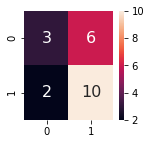

In [5]:
# Passing actual labels and predicted labels
es.estimate(test_labels, predictions)

#### Step 6: Plotting learning curves
* Using custom function ```plot_learning_curve()```
* ```plot_learning_curve()``` takes the following arguments
1. Model
2. Plot title
3. Training Features
4. Training Labels

<module 'matplotlib.pyplot' from '/home/sirius/anaconda3/envs/tf/lib/python3.8/site-packages/matplotlib/pyplot.py'>

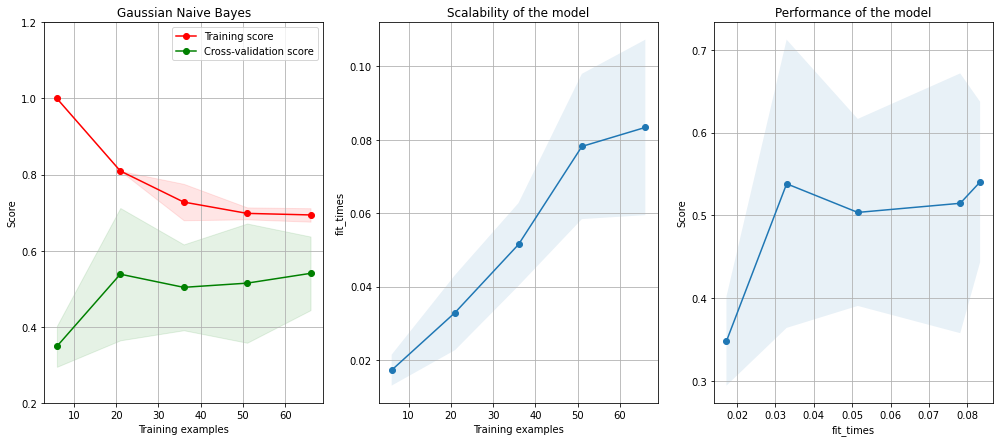

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(17, 7))

es.plot_learning_curve(clf, "Gaussian Naive Bayes", train_features, train_labels, axes=axes[:, ], ylim=(0.2, 1.2),
                    cv=None, n_jobs=4)
plt.show()

---

---